# COVID-19 vaccination progress in Mexico: a time series analysis

**BCS. Genaro Almaraz**

- [Paper at ResearchGate](https://www.researchgate.net/publication/352062823_COVID-19_Vaccination_Progress_in_Mexico_a_Time_Series_Analysis)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and Data visualization

In [ ]:
# Data downloaded from: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

all_data = pd.read_csv('./vaccinations.csv')

In [ ]:
all_data

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15501,Zimbabwe,ZWE,2021-04-24,372099.0,324488.0,47611.0,6114.0,8600.0,2.50,2.18,0.32,579.0
15502,Zimbabwe,ZWE,2021-04-25,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0
15503,Zimbabwe,ZWE,2021-04-26,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0
15504,Zimbabwe,ZWE,2021-04-27,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0


In [ ]:
all_data.shape

(15506, 12)

In [ ]:
mexico_data = all_data.loc[all_data['location'] == 'Mexico']
mexico_data

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
8988,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
8989,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0
8990,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0
8991,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0
8992,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9108,Mexico,MEX,2021-04-23,15874809.0,11807897.0,5347232.0,397292.0,350443.0,12.31,9.16,4.15,2718.0
9109,Mexico,MEX,2021-04-24,16214484.0,11961104.0,5646105.0,339675.0,319472.0,12.58,9.28,4.38,2478.0
9110,Mexico,MEX,2021-04-25,16410034.0,12038498.0,5830079.0,195550.0,309886.0,12.73,9.34,4.52,2403.0
9111,Mexico,MEX,2021-04-26,16501739.0,12054021.0,5917676.0,91705.0,304809.0,12.80,9.35,4.59,2364.0


In [ ]:
mexico_data.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

In [ ]:
len(mexico_data.columns)

12

In [ ]:
mexico_data.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

In [ ]:
missing_values = mexico_data.isnull().sum()
missing_values[missing_values > 0]

total_vaccinations                      9
people_vaccinated                      18
people_fully_vaccinated                34
daily_vaccinations_raw                 15
daily_vaccinations                      1
total_vaccinations_per_hundred          9
people_vaccinated_per_hundred          18
people_fully_vaccinated_per_hundred    34
daily_vaccinations_per_million          1
dtype: int64

In [ ]:
mexico_data.fillna(value=0, inplace=True)
mexico_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
8988,Mexico,MEX,2020-12-24,2924.0,2924.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
8989,Mexico,MEX,2020-12-25,0.0,0.0,0.0,0.0,1300.0,0.00,0.00,0.00,10.0
8990,Mexico,MEX,2020-12-26,0.0,0.0,0.0,0.0,1300.0,0.00,0.00,0.00,10.0
8991,Mexico,MEX,2020-12-27,6824.0,6824.0,0.0,0.0,1300.0,0.01,0.01,0.00,10.0
8992,Mexico,MEX,2020-12-28,9579.0,9579.0,0.0,2755.0,1664.0,0.01,0.01,0.00,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9108,Mexico,MEX,2021-04-23,15874809.0,11807897.0,5347232.0,397292.0,350443.0,12.31,9.16,4.15,2718.0
9109,Mexico,MEX,2021-04-24,16214484.0,11961104.0,5646105.0,339675.0,319472.0,12.58,9.28,4.38,2478.0
9110,Mexico,MEX,2021-04-25,16410034.0,12038498.0,5830079.0,195550.0,309886.0,12.73,9.34,4.52,2403.0
9111,Mexico,MEX,2021-04-26,16501739.0,12054021.0,5917676.0,91705.0,304809.0,12.80,9.35,4.59,2364.0


In [ ]:
mexico_data['date']

8988    2020-12-24
8989    2020-12-25
8990    2020-12-26
8991    2020-12-27
8992    2020-12-28
           ...    
9108    2021-04-23
9109    2021-04-24
9110    2021-04-25
9111    2021-04-26
9112    2021-04-27
Name: date, Length: 125, dtype: object

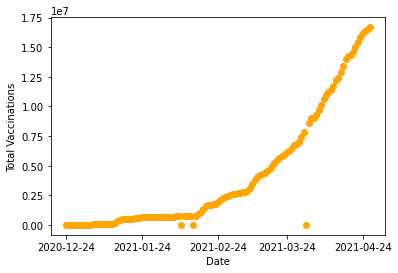

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['total_vaccinations'], color='orange')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

In [ ]:
previous_result = 0
offset = 0
for total in mexico_data['total_vaccinations']:
  if total != 0:
    previous_result = total
  else:
    mexico_data.iloc[offset, mexico_data.columns.get_loc('total_vaccinations')] = previous_result

  offset += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


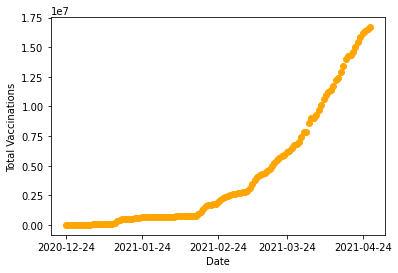

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['total_vaccinations'], color='orange')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

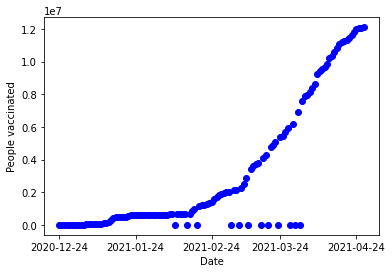

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['people_vaccinated'], color='blue')
plt.xlabel('Date')
plt.ylabel('People vaccinated')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

In [ ]:
previous_result = 0
offset = 0
for total in mexico_data['people_vaccinated']:
  if total != 0:
    previous_result = total
  else:
    mexico_data.iloc[offset, mexico_data.columns.get_loc('people_vaccinated')] = previous_result
  
  offset += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


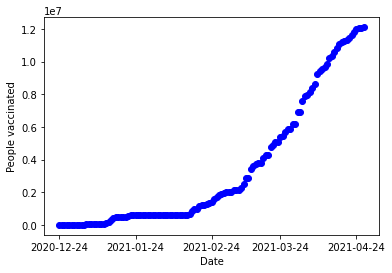

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['people_vaccinated'], color='blue')
plt.xlabel('Date')
plt.ylabel('People vaccinated')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

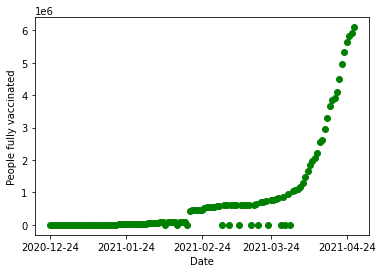

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['people_fully_vaccinated'], color='green')
plt.xlabel('Date')
plt.ylabel('People fully vaccinated')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

In [ ]:
previous_result = 0
offset = 0
for total in mexico_data['people_fully_vaccinated']:
  if total != 0:
    previous_result = total
  else:
    mexico_data.iloc[offset, mexico_data.columns.get_loc('people_fully_vaccinated')] = previous_result
    
  offset += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


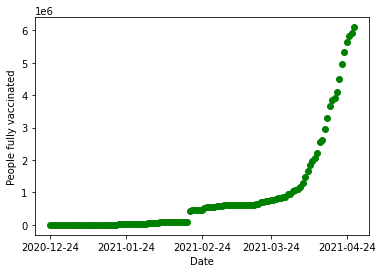

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['people_fully_vaccinated'], color='green')
plt.xlabel('Date')
plt.ylabel('People fully vaccinated')
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

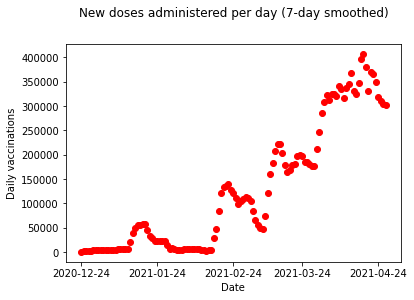

In [ ]:
plt.scatter(mexico_data['date'], mexico_data['daily_vaccinations'], color='red')
plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.title('New doses administered per day (7-day smoothed)', y=1.1)
plt.xticks(ticks=['2020-12-24', '2021-01-24', '2021-02-24', '2021-03-24', '2021-04-24'])
plt.show()

# Modeling

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mexico_data['date'].min(), mexico_data['date'].max()

('2020-12-24', '2021-04-27')

In [ ]:
total_vaccinations = mexico_data[['date', 'total_vaccinations']]
total_vaccinations

,date,total_vaccinations
8988,2020-12-24,2924.0
8989,2020-12-25,2924.0
8990,2020-12-26,2924.0
8991,2020-12-27,6824.0
8992,2020-12-28,9579.0
...,...,...
9108,2021-04-23,15874809.0
9109,2021-04-24,16214484.0
9110,2021-04-25,16410034.0
9111,2021-04-26,16501739.0


In [ ]:
people_vaccinated = mexico_data[['date', 'people_vaccinated']]
people_vaccinated

,date,people_vaccinated
8988,2020-12-24,2924.0
8989,2020-12-25,2924.0
8990,2020-12-26,2924.0
8991,2020-12-27,6824.0
8992,2020-12-28,9579.0
...,...,...
9108,2021-04-23,11807897.0
9109,2021-04-24,11961104.0
9110,2021-04-25,12038498.0
9111,2021-04-26,12054021.0


In [ ]:
people_fully_vaccinated = mexico_data[['date', 'people_fully_vaccinated']]
people_fully_vaccinated

,date,people_fully_vaccinated
8988,2020-12-24,0.0
8989,2020-12-25,0.0
8990,2020-12-26,0.0
8991,2020-12-27,0.0
8992,2020-12-28,0.0
...,...,...
9108,2021-04-23,5347232.0
9109,2021-04-24,5646105.0
9110,2021-04-25,5830079.0
9111,2021-04-26,5917676.0


In [ ]:
missing_values = total_vaccinations.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
missing_values = people_vaccinated.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
missing_values = people_fully_vaccinated.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
total_vaccinations.columns, total_vaccinations.dtypes

(Index(['date', 'total_vaccinations'], dtype='object'),
 date                   object
 total_vaccinations    float64
 dtype: object)

In [ ]:
people_vaccinated.columns, people_vaccinated.dtypes

(Index(['date', 'people_vaccinated'], dtype='object'),
 date                  object
 people_vaccinated    float64
 dtype: object)

In [ ]:
people_fully_vaccinated.columns

Index(['date', 'people_fully_vaccinated'], dtype='object')

In [ ]:
people_fully_vaccinated.dtypes

date                        object
people_fully_vaccinated    float64
dtype: object

In [ ]:
total_vaccinations['date'] = pd.to_datetime(total_vaccinations['date'], infer_datetime_format=True)
total_vaccinations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,total_vaccinations
8988,2020-12-24,2924.0
8989,2020-12-25,2924.0
8990,2020-12-26,2924.0
8991,2020-12-27,6824.0
8992,2020-12-28,9579.0
...,...,...
9108,2021-04-23,15874809.0
9109,2021-04-24,16214484.0
9110,2021-04-25,16410034.0
9111,2021-04-26,16501739.0


In [ ]:
total_vaccinations.dtypes

date                  datetime64[ns]
total_vaccinations           float64
dtype: object

In [ ]:
people_vaccinated['date'] = pd.to_datetime(people_vaccinated['date'], infer_datetime_format=True)
people_vaccinated

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,people_vaccinated
8988,2020-12-24,2924.0
8989,2020-12-25,2924.0
8990,2020-12-26,2924.0
8991,2020-12-27,6824.0
8992,2020-12-28,9579.0
...,...,...
9108,2021-04-23,11807897.0
9109,2021-04-24,11961104.0
9110,2021-04-25,12038498.0
9111,2021-04-26,12054021.0


In [ ]:
people_vaccinated.dtypes

date                 datetime64[ns]
people_vaccinated           float64
dtype: object

In [ ]:
people_fully_vaccinated['date'] = pd.to_datetime(people_fully_vaccinated['date'], infer_datetime_format=True)
people_fully_vaccinated

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,people_fully_vaccinated
8988,2020-12-24,0.0
8989,2020-12-25,0.0
8990,2020-12-26,0.0
8991,2020-12-27,0.0
8992,2020-12-28,0.0
...,...,...
9108,2021-04-23,5347232.0
9109,2021-04-24,5646105.0
9110,2021-04-25,5830079.0
9111,2021-04-26,5917676.0


In [ ]:
people_fully_vaccinated.dtypes

date                       datetime64[ns]
people_fully_vaccinated           float64
dtype: object

In [ ]:
total_vaccinations = total_vaccinations.set_index('date')
total_vaccinations

,total_vaccinations
date,
2020-12-24,2924.0
2020-12-25,2924.0
2020-12-26,2924.0
2020-12-27,6824.0
2020-12-28,9579.0
...,...
2021-04-23,15874809.0
2021-04-24,16214484.0
2021-04-25,16410034.0


In [ ]:
people_vaccinated = people_vaccinated.set_index('date')
people_vaccinated

,people_vaccinated
date,
2020-12-24,2924.0
2020-12-25,2924.0
2020-12-26,2924.0
2020-12-27,6824.0
2020-12-28,9579.0
...,...
2021-04-23,11807897.0
2021-04-24,11961104.0
2021-04-25,12038498.0


In [ ]:
people_fully_vaccinated = people_fully_vaccinated.set_index('date')
people_fully_vaccinated.index

DatetimeIndex(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-01', '2021-01-02',
               ...
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27'],
              dtype='datetime64[ns]', name='date', length=125, freq=None)

In [ ]:
people_fully_vaccinated

,people_fully_vaccinated
date,
2020-12-24,0.0
2020-12-25,0.0
2020-12-26,0.0
2020-12-27,0.0
2020-12-28,0.0
...,...
2021-04-23,5347232.0
2021-04-24,5646105.0
2021-04-25,5830079.0


In [ ]:
total_vaccinations.loc['2021-01-27']

total_vaccinations    656044.0
Name: 2021-01-27 00:00:00, dtype: float64

In [ ]:
people_vaccinated.loc['2021-01-27']

people_vaccinated    624730.0
Name: 2021-01-27 00:00:00, dtype: float64

In [ ]:
people_fully_vaccinated.loc['2021-01-27']

people_fully_vaccinated    31314.0
Name: 2021-01-27 00:00:00, dtype: float64

In [ ]:
people_fully_vaccinated.shape

(125, 1)

In [ ]:
people_fully_vaccinated.dtypes

people_fully_vaccinated    float64
dtype: object

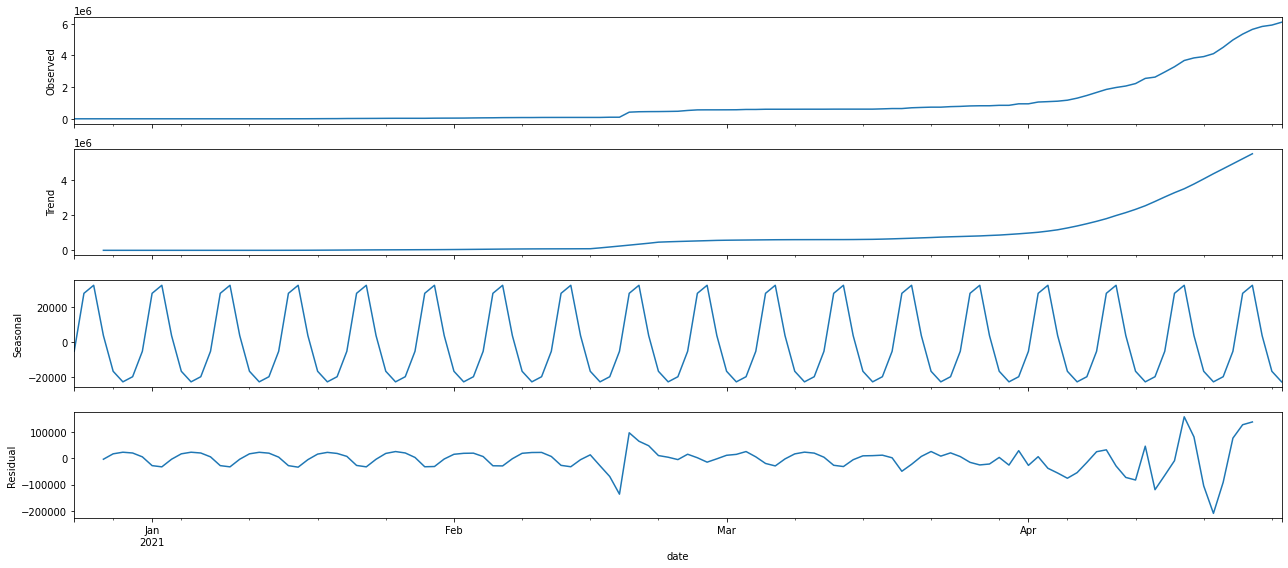

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(people_fully_vaccinated, model='additive')
decomposition.plot()
plt.show()

# ARIMA

In [ ]:
import itertools
import numpy as np

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(people_fully_vaccinated,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3909.4019327237265
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3579.601422329948


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3421.2708372610005
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3130.5177256808543
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3243.401496189784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3214.6743856500534
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2941.942339854269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2870.334447361543
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3791.922833146755
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3514.1408836675014


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3309.908151644352


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3067.770876191592
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3458.2494647908907
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3399.184099593144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2997.0275388182463


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2934.2646926294783
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3210.5319692276685
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2893.9495528378275
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2868.5015284433935
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2572.741821906872
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2894.377918664672


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2868.2370144153115
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2595.160397103715


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2573.283514491876
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:3133.209349206468
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2829.7560367243104
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2827.071857326532


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2520.713730036426
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2877.42600498129
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2826.494836984841


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2570.6659532979525


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2522.657295299013
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:3104.710645102379
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2874.3847015734846
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2873.732816494068


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2645.440866437373
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2814.3663102411856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2812.4327102917705


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2557.5531392308694


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2533.584478942963
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:3064.548407926833
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2838.985869896609
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2842.008801700301


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2618.3494176799913
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2800.3807468301957


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2776.891835107137


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2544.76946718597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2500.7482534149517
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3080.7045937139096
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2794.2350442098445
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2840.5191778758094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2508.29238541524
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2794.228526361513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2783.662864854824
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2521.4470027058974


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2510.2416930915288
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3047.375198053147
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2758.0712181248423


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2815.455854084218


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2478.4091209661938
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2782.522962782892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2759.8622513350065


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2521.1662756157707


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2479.7654176365136


In [ ]:
mod = sm.tsa.statespace.SARIMAX(people_fully_vaccinated,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0057      0.021     46.964      0.000       0.964       1.048
ma.L1         -0.6915      0.116     -5.953      0.000      -0.919      -0.464
ma.S.L12      -1.1047      0.080    -13.843      0.000      -1.261      -0.948
sigma2       7.44e+09   3.17e-12   2.35e+21      0.000    7.44e+09    7.44e+09


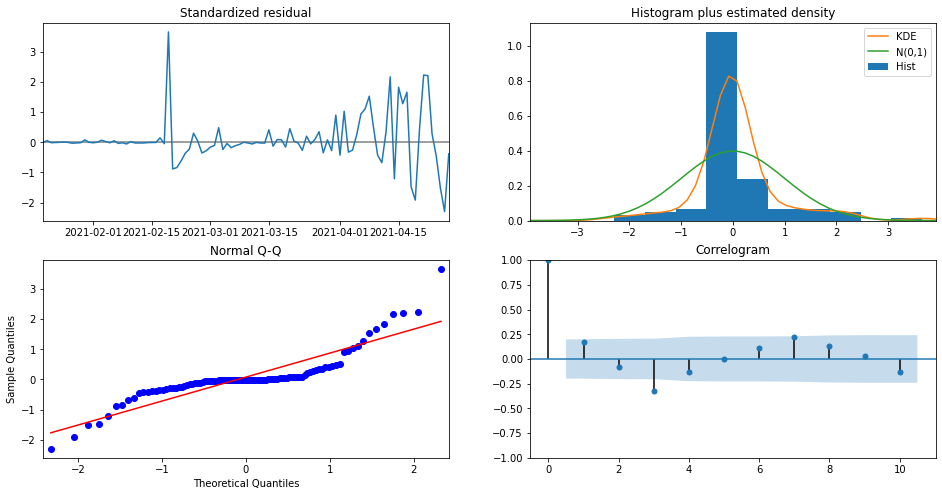

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-24'), dynamic=False)
pred.predicted_mean

2020-12-24    0.000000e+00
2020-12-25    0.000000e+00
2020-12-26    0.000000e+00
2020-12-27    0.000000e+00
2020-12-28    0.000000e+00
                  ...     
2021-04-23    5.322884e+06
2021-04-24    5.685127e+06
2021-04-25    5.961152e+06
2021-04-26    6.116274e+06
2021-04-27    6.130127e+06
Freq: D, Length: 125, dtype: float64

In [ ]:
pred.conf_int()

,lower people_fully_vaccinated,upper people_fully_vaccinated
2020-12-24,-3.394757e+03,3.394757e+03
2020-12-25,-1.690850e+05,1.690850e+05
2020-12-26,-1.690876e+05,1.690876e+05
2020-12-27,-1.690888e+05,1.690888e+05
2020-12-28,-1.690894e+05,1.690894e+05
...,...,...
2021-04-23,5.153641e+06,5.492128e+06
2021-04-24,5.515729e+06,5.854526e+06
2021-04-25,5.791800e+06,6.130505e+06
2021-04-26,5.946944e+06,6.285604e+06


In [ ]:
people_fully_vaccinated['people_fully_vaccinated'].min(), people_fully_vaccinated['people_fully_vaccinated'].max()

(0.0, 6096954.0)

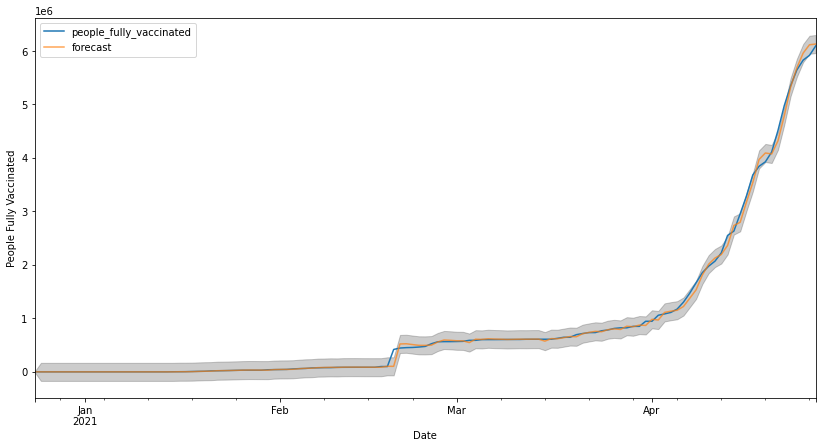

In [ ]:
pred_ci = pred.conf_int()
ax = people_fully_vaccinated.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('People Fully Vaccinated')
plt.legend()
plt.show()

In [ ]:
forecasted = pred.predicted_mean
forecasted

2020-12-24    0.000000e+00
2020-12-25    0.000000e+00
2020-12-26    0.000000e+00
2020-12-27    0.000000e+00
2020-12-28    0.000000e+00
                  ...     
2021-04-23    5.322884e+06
2021-04-24    5.685127e+06
2021-04-25    5.961152e+06
2021-04-26    6.116274e+06
2021-04-27    6.130127e+06
Freq: D, Length: 125, dtype: float64

In [ ]:
truth = people_fully_vaccinated.loc['2020-12-24':]['people_fully_vaccinated']
truth

date
2020-12-24          0.0
2020-12-25          0.0
2020-12-26          0.0
2020-12-27          0.0
2020-12-28          0.0
                ...    
2021-04-23    5347232.0
2021-04-24    5646105.0
2021-04-25    5830079.0
2021-04-26    5917676.0
2021-04-27    6096954.0
Name: people_fully_vaccinated, Length: 125, dtype: float64

In [ ]:
mse = ((forecasted - truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3733845640.42


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 61105.2


In [ ]:
people_fully_vaccinated.describe()

,people_fully_vaccinated
count,1.250000e+02
mean,8.878388e+05
std,1.428751e+06
min,0.000000e+00
25%,2.518500e+04
50%,4.753890e+05
75%,8.232840e+05
max,6.096954e+06


In [ ]:
pred_uc = results.get_forecast('2021-12-31')
pred_ci = pred_uc.conf_int()
pred_ci

,lower people_fully_vaccinated,upper people_fully_vaccinated
2021-04-28,6.137074e+06,6.475705e+06
2021-04-29,6.223389e+06,6.782929e+06
2021-04-30,6.325004e+06,7.111599e+06
2021-05-01,6.424597e+06,7.451979e+06
2021-05-02,6.451718e+06,7.735359e+06
...,...,...
2021-12-27,-8.638926e+07,1.433499e+08
2021-12-28,-8.732057e+07,1.440207e+08
2021-12-29,-8.822450e+07,1.447280e+08
2021-12-30,-8.913562e+07,1.454375e+08


In [ ]:
pred_uc.predicted_mean

2021-04-28    6.306390e+06
2021-04-29    6.503159e+06
2021-04-30    6.718301e+06
2021-05-01    6.938288e+06
2021-05-02    7.093539e+06
                  ...     
2021-12-27    2.848032e+07
2021-12-28    2.835006e+07
2021-12-29    2.825177e+07
2021-12-30    2.815094e+07
2021-12-31    2.806787e+07
Freq: D, Length: 248, dtype: float64

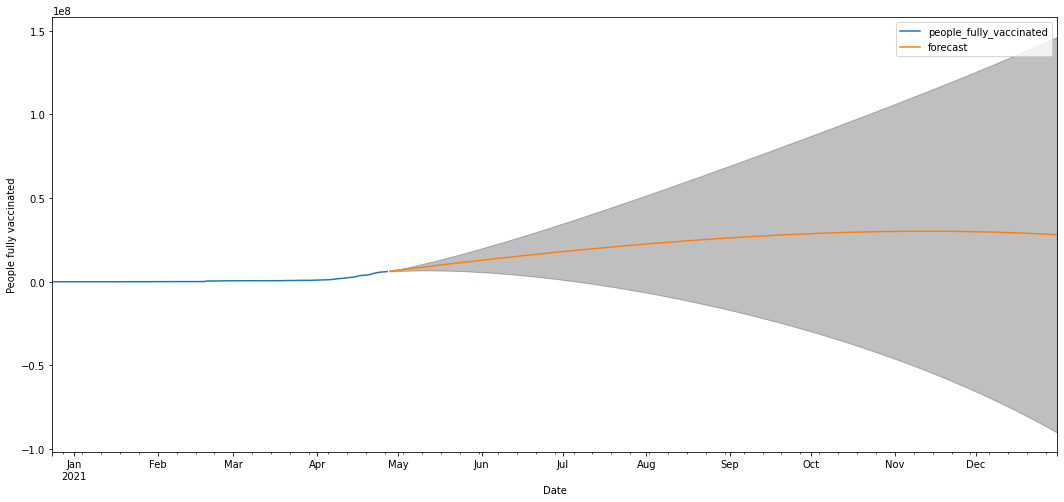

In [ ]:
ax = people_fully_vaccinated.plot(label='observed', figsize=(18, 8))
pred_uc.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('People fully vaccinated')
plt.legend()
plt.show()

In [ ]:
pred_uc = results.get_forecast('2021-06-27')
pred_ci = pred_uc.conf_int()
pred_ci

,lower people_fully_vaccinated,upper people_fully_vaccinated
2021-04-28,6.137074e+06,6.475705e+06
2021-04-29,6.223389e+06,6.782929e+06
2021-04-30,6.325004e+06,7.111599e+06
2021-05-01,6.424597e+06,7.451979e+06
2021-05-02,6.451718e+06,7.735359e+06
...,...,...
2021-06-23,2.653781e+06,3.064249e+07
2021-06-24,2.473652e+06,3.115370e+07
2021-06-25,2.313045e+06,3.169064e+07
2021-06-26,2.126893e+06,3.220835e+07


In [ ]:
pred_uc.predicted_mean

2021-04-28    6.306390e+06
2021-04-29    6.503159e+06
2021-04-30    6.718301e+06
2021-05-01    6.938288e+06
2021-05-02    7.093539e+06
                  ...     
2021-06-23    1.664813e+07
2021-06-24    1.681368e+07
2021-06-25    1.700184e+07
2021-06-26    1.716762e+07
2021-06-27    1.733822e+07
Freq: D, Length: 61, dtype: float64

In [ ]:
pred_uc.predicted_mean[-1]

17338220.975154728

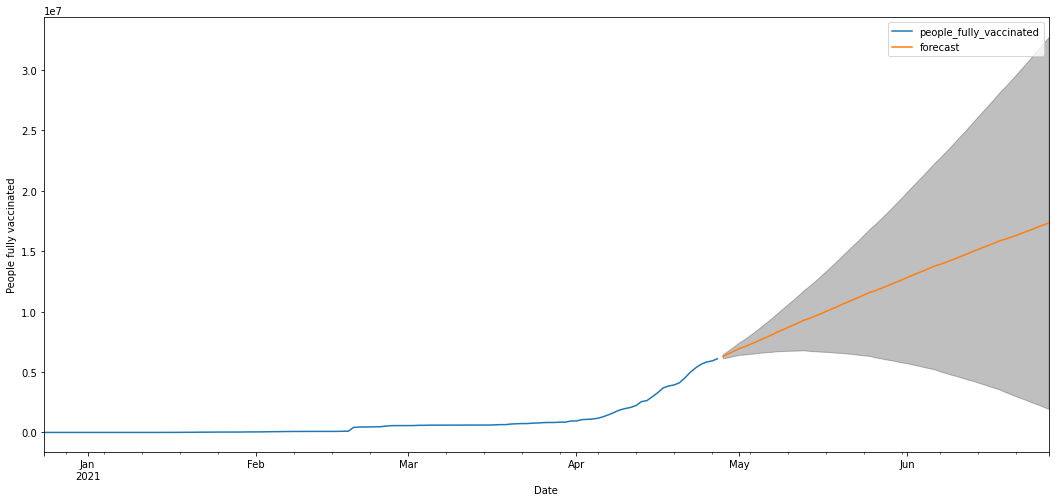

In [ ]:
ax = people_fully_vaccinated.plot(label='observed', figsize=(18, 8))
pred_uc.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('People fully vaccinated')
plt.legend()
plt.show()

In [ ]:
total_vaccinations.index.min(), total_vaccinations.index.max()

(Timestamp('2020-12-24 00:00:00'), Timestamp('2021-04-27 00:00:00'))

In [ ]:
people_vaccinated.index.min(), people_vaccinated.index.max()

(Timestamp('2020-12-24 00:00:00'), Timestamp('2021-04-27 00:00:00'))

In [ ]:
people_fully_vaccinated.index.min(), people_fully_vaccinated.index.max()

(Timestamp('2020-12-24 00:00:00'), Timestamp('2021-04-27 00:00:00'))

In [ ]:
aux_merge = pd.merge(total_vaccinations, people_vaccinated, left_index=True, right_index=True)
aux_merge

,total_vaccinations,people_vaccinated
date,,
2020-12-24,2924.0,2924.0
2020-12-25,2924.0,2924.0
2020-12-26,2924.0,2924.0
2020-12-27,6824.0,6824.0
2020-12-28,9579.0,9579.0
...,...,...
2021-04-23,15874809.0,11807897.0
2021-04-24,16214484.0,11961104.0
2021-04-25,16410034.0,12038498.0


In [ ]:
merge_data = pd.merge(aux_merge, people_fully_vaccinated, left_index=True, right_index=True)
merge_data

,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,
2020-12-24,2924.0,2924.0,0.0
2020-12-25,2924.0,2924.0,0.0
2020-12-26,2924.0,2924.0,0.0
2020-12-27,6824.0,6824.0,0.0
2020-12-28,9579.0,9579.0,0.0
...,...,...,...
2021-04-23,15874809.0,11807897.0,5347232.0
2021-04-24,16214484.0,11961104.0,5646105.0
2021-04-25,16410034.0,12038498.0,5830079.0


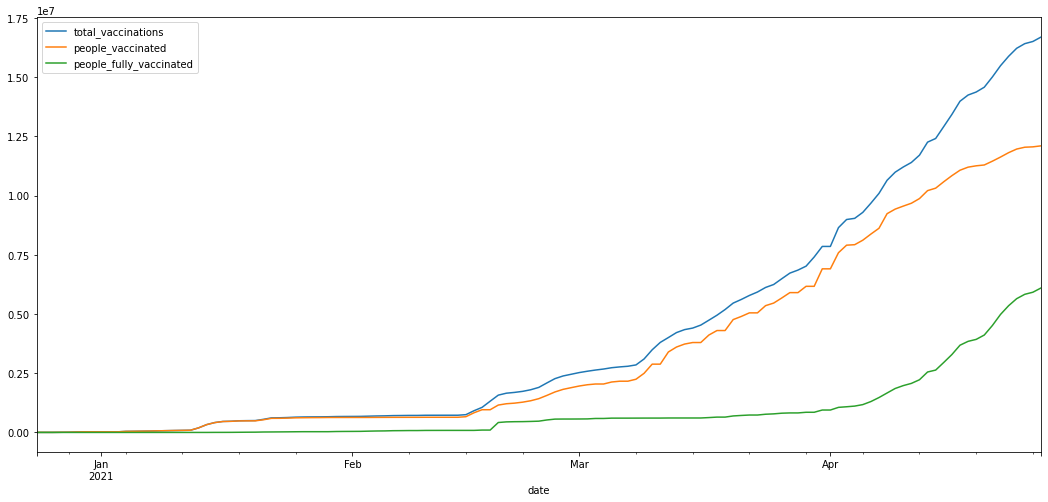

In [ ]:
merge_data.plot()
plt.show()

In [ ]:
first_date = merge_data.iloc[np.min(list(np.where(merge_data['people_vaccinated'] == merge_data['total_vaccinations'])))]
first_date

total_vaccinations         2924.0
people_vaccinated          2924.0
people_fully_vaccinated       0.0
Name: 2020-12-24 00:00:00, dtype: float64

In [ ]:
list(np.where(merge_data['people_vaccinated'] == merge_data['people_fully_vaccinated']))

[array([], dtype=int64)]

## Facebook Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
people_vaccinated

,people_vaccinated
date,
2020-12-24,2924.0
2020-12-25,2924.0
2020-12-26,2924.0
2020-12-27,6824.0
2020-12-28,9579.0
...,...
2021-04-23,11807897.0
2021-04-24,11961104.0
2021-04-25,12038498.0


In [ ]:
people_fully_vaccinated

,people_fully_vaccinated
date,
2020-12-24,0.0
2020-12-25,0.0
2020-12-26,0.0
2020-12-27,0.0
2020-12-28,0.0
...,...
2021-04-23,5347232.0
2021-04-24,5646105.0
2021-04-25,5830079.0


In [ ]:
people_vaccinated_prophet = people_vaccinated.rename(columns={'people_vaccinated': 'y'}, index={'date': 'ds'})
people_vaccinated_prophet.index.rename('ds', inplace=True)
people_vaccinated_prophet

,y
ds,
2020-12-24,2924.0
2020-12-25,2924.0
2020-12-26,2924.0
2020-12-27,6824.0
2020-12-28,9579.0
...,...
2021-04-23,11807897.0
2021-04-24,11961104.0
2021-04-25,12038498.0


In [ ]:
people_fully_vaccinated_prophet = people_fully_vaccinated.rename(columns={'people_fully_vaccinated': 'y'}, index={'date': 'ds'})
people_fully_vaccinated_prophet.index.rename('ds', inplace=True)
people_fully_vaccinated_prophet

,y
ds,
2020-12-24,0.0
2020-12-25,0.0
2020-12-26,0.0
2020-12-27,0.0
2020-12-28,0.0
...,...
2021-04-23,5347232.0
2021-04-24,5646105.0
2021-04-25,5830079.0


In [ ]:
people_vaccinated_prophet.reset_index(inplace=True)
people_vaccinated_prophet

,ds,y
0,2020-12-24,2924.0
1,2020-12-25,2924.0
2,2020-12-26,2924.0
3,2020-12-27,6824.0
4,2020-12-28,9579.0
...,...,...
120,2021-04-23,11807897.0
121,2021-04-24,11961104.0
122,2021-04-25,12038498.0
123,2021-04-26,12054021.0


In [ ]:
people_fully_vaccinated_prophet.reset_index(inplace=True)
people_fully_vaccinated_prophet

,ds,y
0,2020-12-24,0.0
1,2020-12-25,0.0
2,2020-12-26,0.0
3,2020-12-27,0.0
4,2020-12-28,0.0
...,...,...
120,2021-04-23,5347232.0
121,2021-04-24,5646105.0
122,2021-04-25,5830079.0
123,2021-04-26,5917676.0


In [ ]:
people_vaccinated_model = Prophet(interval_width=0.95)
people_vaccinated_model.fit(people_vaccinated_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
people_fully_vaccinated_model = Prophet(interval_width=0.95)
people_fully_vaccinated_model.fit(people_fully_vaccinated_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
people_vaccinated_forecast = people_vaccinated_model.make_future_dataframe(periods=0, freq='D')
people_vaccinated_forecast

,ds
0,2020-12-24
1,2020-12-25
2,2020-12-26
3,2020-12-27
4,2020-12-28
...,...
120,2021-04-23
121,2021-04-24
122,2021-04-25
123,2021-04-26


In [ ]:
people_fully_vaccinated_forecast = people_fully_vaccinated_model.make_future_dataframe(periods=0, freq='D')
people_fully_vaccinated_forecast

,ds
0,2020-12-24
1,2020-12-25
2,2020-12-26
3,2020-12-27
4,2020-12-28
...,...
120,2021-04-23
121,2021-04-24
122,2021-04-25
123,2021-04-26


In [ ]:
people_vaccinated_forecast = people_vaccinated_model.predict(people_vaccinated_forecast)
people_vaccinated_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-24,-9.176743e+04,-5.048910e+05,2.907199e+05,-9.176743e+04,-9.176743e+04,7397.849721,7397.849721,7397.849721,7397.849721,7397.849721,7397.849721,0.0,0.0,0.0,-8.436958e+04
1,2020-12-25,-7.358488e+04,-3.955127e+05,3.646943e+05,-7.358488e+04,-7.358488e+04,52899.657400,52899.657400,52899.657400,52899.657400,52899.657400,52899.657400,0.0,0.0,0.0,-2.068522e+04
2,2020-12-26,-5.540233e+04,-3.582185e+05,4.073228e+05,-5.540233e+04,-5.540233e+04,60178.572098,60178.572098,60178.572098,60178.572098,60178.572098,60178.572098,0.0,0.0,0.0,4.776242e+03
3,2020-12-27,-3.721978e+04,-4.196006e+05,3.535094e+05,-3.721978e+04,-3.721978e+04,-4071.960701,-4071.960701,-4071.960701,-4071.960701,-4071.960701,-4071.960701,0.0,0.0,0.0,-4.129174e+04
4,2020-12-28,-1.903723e+04,-4.254334e+05,3.448011e+05,-1.903723e+04,-1.903723e+04,-42941.351463,-42941.351463,-42941.351463,-42941.351463,-42941.351463,-42941.351463,0.0,0.0,0.0,-6.197858e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-04-23,1.197304e+07,1.161085e+07,1.241485e+07,1.197304e+07,1.197304e+07,52899.657400,52899.657400,52899.657400,52899.657400,52899.657400,52899.657400,0.0,0.0,0.0,1.202594e+07
121,2021-04-24,1.218980e+07,1.184964e+07,1.263167e+07,1.218980e+07,1.218980e+07,60178.572098,60178.572098,60178.572098,60178.572098,60178.572098,60178.572098,0.0,0.0,0.0,1.224998e+07
122,2021-04-25,1.240656e+07,1.200733e+07,1.281247e+07,1.240656e+07,1.240656e+07,-4071.960701,-4071.960701,-4071.960701,-4071.960701,-4071.960701,-4071.960701,0.0,0.0,0.0,1.240249e+07
123,2021-04-26,1.262332e+07,1.221552e+07,1.296648e+07,1.262332e+07,1.262332e+07,-42941.351463,-42941.351463,-42941.351463,-42941.351463,-42941.351463,-42941.351463,0.0,0.0,0.0,1.258038e+07


In [ ]:
people_fully_vaccinated_forecast = people_fully_vaccinated_model.predict(people_fully_vaccinated_forecast)
people_fully_vaccinated_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-24,-4.126233e+04,-3.868329e+05,3.015253e+05,-4.126233e+04,-4.126233e+04,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,0.0,0.0,0.0,-5.002207e+04
1,2020-12-25,-3.919489e+04,-3.691258e+05,3.273075e+05,-3.919489e+04,-3.919489e+04,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,0.0,0.0,0.0,-9.158090e+03
2,2020-12-26,-3.712745e+04,-3.530661e+05,3.301109e+05,-3.712745e+04,-3.712745e+04,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,0.0,0.0,0.0,-4.234437e+03
3,2020-12-27,-3.506000e+04,-3.506947e+05,3.242773e+05,-3.506000e+04,-3.506000e+04,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,0.0,0.0,0.0,-2.404087e+04
4,2020-12-28,-3.299256e+04,-3.882404e+05,2.646871e+05,-3.299256e+04,-3.299256e+04,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,0.0,0.0,0.0,-4.702462e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-04-23,4.905253e+06,4.571154e+06,5.286122e+06,4.905253e+06,4.905253e+06,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,0.0,0.0,0.0,4.935290e+06
121,2021-04-24,5.101016e+06,4.798772e+06,5.491937e+06,5.101016e+06,5.101016e+06,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,0.0,0.0,0.0,5.133909e+06
122,2021-04-25,5.296779e+06,4.958442e+06,5.645547e+06,5.296779e+06,5.296779e+06,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,0.0,0.0,0.0,5.307798e+06
123,2021-04-26,5.492542e+06,5.143180e+06,5.807598e+06,5.492542e+06,5.492542e+06,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,0.0,0.0,0.0,5.478510e+06


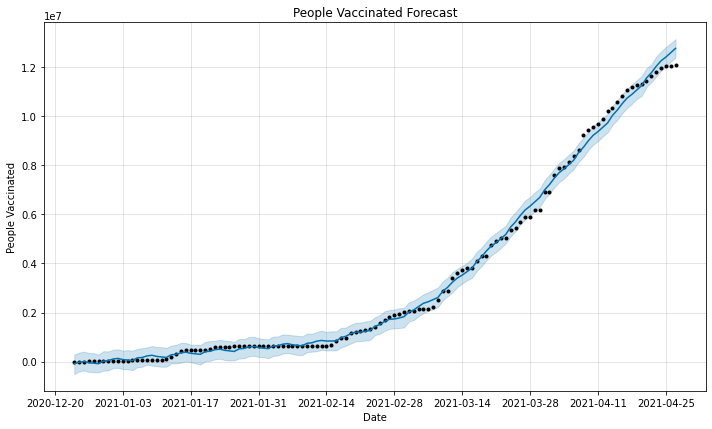

In [ ]:
people_vaccinated_model.plot(people_vaccinated_forecast, xlabel='Date', ylabel='People Vaccinated')
plt.title('People Vaccinated Forecast')
plt.show()

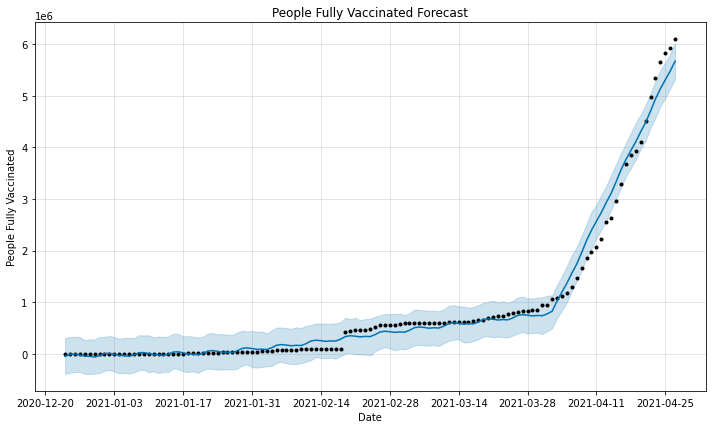

In [ ]:
people_fully_vaccinated_model.plot(people_fully_vaccinated_forecast, xlabel='Date', ylabel='People Fully Vaccinated')
plt.title('People Fully Vaccinated Forecast')
plt.show()

In [ ]:
people_fully_vaccinated_forecast[['yhat']].iloc[-1]

yhat    5.670850e+06
Name: 124, dtype: float64

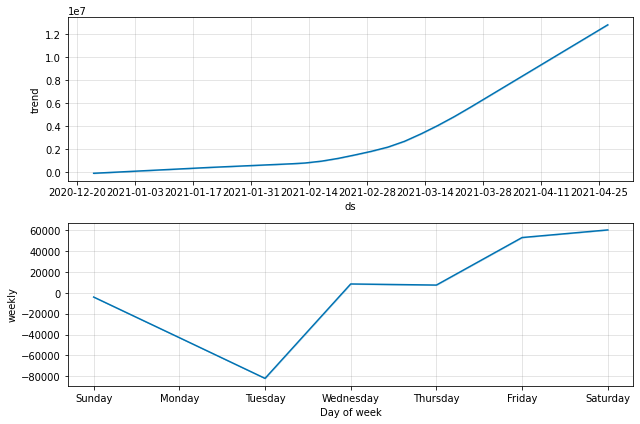

In [ ]:
people_vaccinated_model.plot_components(people_vaccinated_forecast)
plt.show()

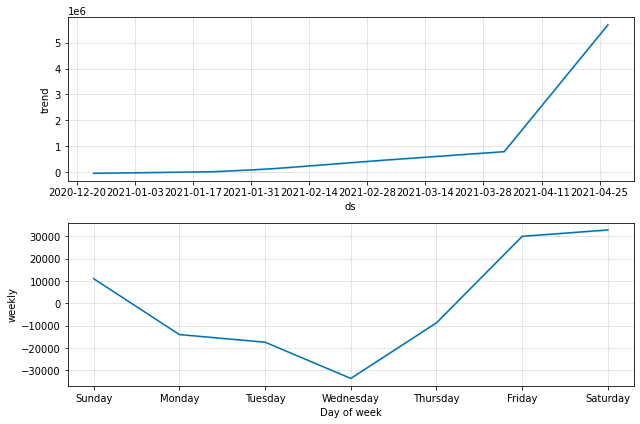

In [ ]:
people_fully_vaccinated_model.plot_components(people_fully_vaccinated_forecast)
plt.show()

In [ ]:
forecasted = people_fully_vaccinated_forecast[['ds', 'yhat']]
forecasted.set_index('ds', inplace=True)
forecasted['yhat']

ds
2020-12-24   -5.002207e+04
2020-12-25   -9.158090e+03
2020-12-26   -4.234437e+03
2020-12-27   -2.404087e+04
2020-12-28   -4.702462e+04
                  ...     
2021-04-23    4.935290e+06
2021-04-24    5.133909e+06
2021-04-25    5.307798e+06
2021-04-26    5.478510e+06
2021-04-27    5.670850e+06
Name: yhat, Length: 125, dtype: float64

In [ ]:
truth

date
2020-12-24          0.0
2020-12-25          0.0
2020-12-26          0.0
2020-12-27          0.0
2020-12-28          0.0
                ...    
2021-04-23    5347232.0
2021-04-24    5646105.0
2021-04-25    5830079.0
2021-04-26    5917676.0
2021-04-27    6096954.0
Name: people_fully_vaccinated, Length: 125, dtype: float64

In [ ]:
mse = mean_squared_error(truth, forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29873745220.59


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 172840.23


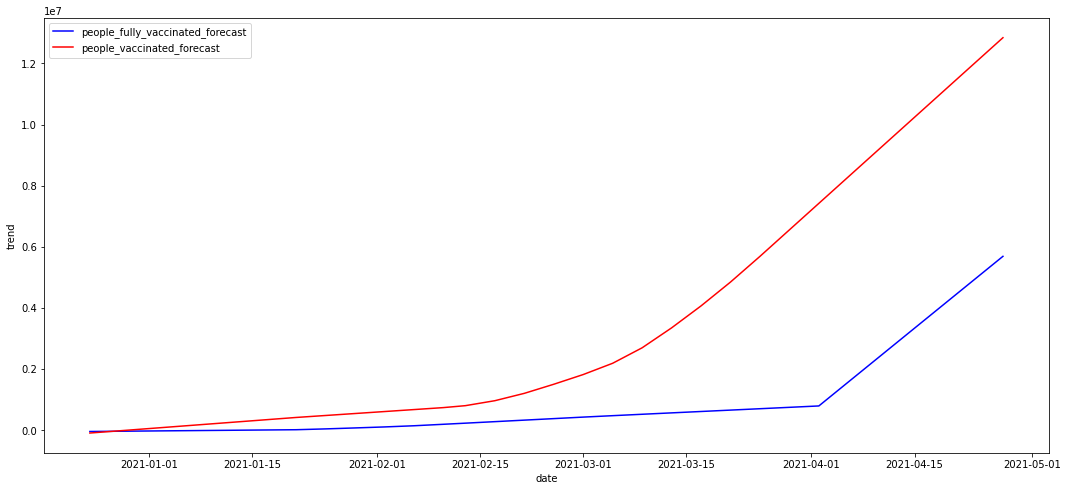

In [ ]:
plt.plot(people_fully_vaccinated_forecast['ds'], people_fully_vaccinated_forecast['trend'], 'b-', label='people_fully_vaccinated_forecast')
plt.plot(people_vaccinated_forecast['ds'], people_vaccinated_forecast['trend'], 'r-', label='people_vaccinated_forecast')
plt.xlabel('date')
plt.ylabel('trend')
plt.legend()
plt.show()

In [ ]:
people_fully_vaccinated_forecast = people_fully_vaccinated_model.make_future_dataframe(periods=61, freq='D')
people_fully_vaccinated_forecast

,ds
0,2020-12-24
1,2020-12-25
2,2020-12-26
3,2020-12-27
4,2020-12-28
...,...
181,2021-06-23
182,2021-06-24
183,2021-06-25
184,2021-06-26


In [ ]:
people_fully_vaccinated_forecast = people_fully_vaccinated_model.predict(people_fully_vaccinated_forecast)
people_fully_vaccinated_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-24,-4.126233e+04,-4.059961e+05,2.792384e+05,-4.126233e+04,-4.126233e+04,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,0.0,0.0,0.0,-5.002207e+04
1,2020-12-25,-3.919489e+04,-3.302207e+05,2.936161e+05,-3.919489e+04,-3.919489e+04,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,0.0,0.0,0.0,-9.158090e+03
2,2020-12-26,-3.712745e+04,-3.590517e+05,3.137269e+05,-3.712745e+04,-3.712745e+04,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,0.0,0.0,0.0,-4.234437e+03
3,2020-12-27,-3.506000e+04,-3.491283e+05,3.266779e+05,-3.506000e+04,-3.506000e+04,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,11019.134404,0.0,0.0,0.0,-2.404087e+04
4,2020-12-28,-3.299256e+04,-3.782893e+05,3.073829e+05,-3.299256e+04,-3.299256e+04,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,-14032.057447,0.0,0.0,0.0,-4.702462e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2021-06-23,1.684679e+07,1.438251e+07,1.911041e+07,1.441942e+07,1.917393e+07,-33702.208787,-33702.208787,-33702.208787,-33702.208787,-33702.208787,-33702.208787,0.0,0.0,0.0,1.681309e+07
182,2021-06-24,1.704256e+07,1.451203e+07,1.949583e+07,1.455761e+07,1.944737e+07,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,-8759.739956,0.0,0.0,0.0,1.703380e+07
183,2021-06-25,1.723832e+07,1.470358e+07,1.969937e+07,1.470044e+07,1.972707e+07,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,30036.800562,0.0,0.0,0.0,1.726836e+07
184,2021-06-26,1.743408e+07,1.478051e+07,1.997409e+07,1.483896e+07,1.999432e+07,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,32893.010299,0.0,0.0,0.0,1.746697e+07


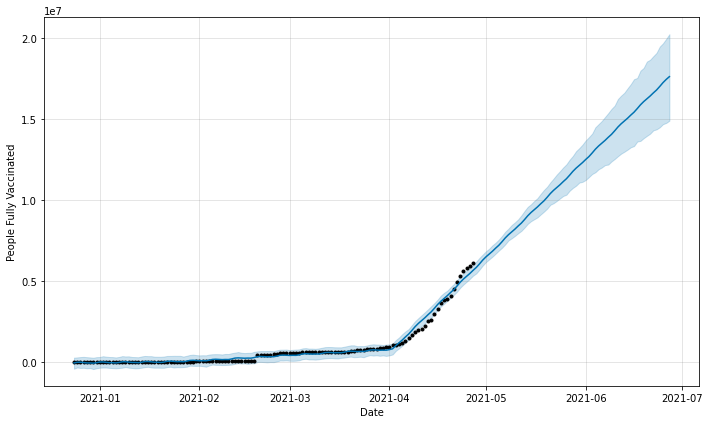

In [ ]:
people_fully_vaccinated_model.plot(people_fully_vaccinated_forecast, xlabel='Date', ylabel='People Fully Vaccinated')
plt.show()

In [ ]:
people_fully_vaccinated_forecast[['yhat']].iloc[-1]

yhat    1.764086e+07
Name: 185, dtype: float64

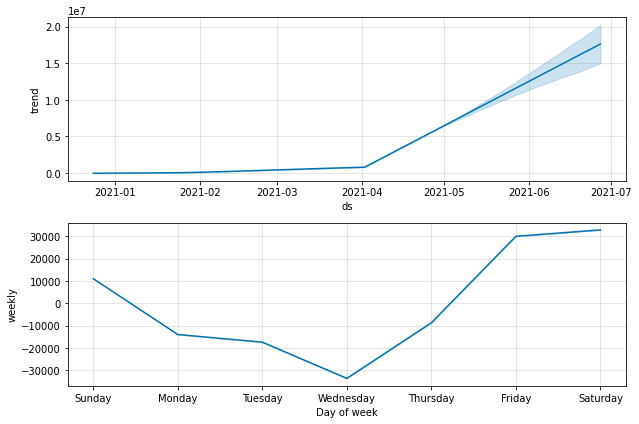

In [ ]:
people_fully_vaccinated_model.plot_components(people_fully_vaccinated_forecast)
plt.show()